<div align ="right">Thomas Jefferson University <b>COMP 103</b>: Data Analysis and Visualization</div>

# Correlation and Regression part II


Correlation and regression analysis are fundamental to data science AND to statistical analysis. Many statistical tests on parametric data are simply extensions of linear regression. In this notebook we will dive a little deeper into correlation and regression analyses. 

## Correlation vs. Regression

**Correlation** is a measure of association between two variables, while **regression** implies a model in which we predict one value based on the value of another. Regression therefore assumes an independent x value that is used to predict a dependent y value. One of the *assumptions* of regression analysis is that x is measured without error, or in other words that x values are 'true' while y variables contain some degree of measurement error. On top of this measurement error is any difference in the y variable that is caused by factors that are not included in our model. The distances of the observed points (represented by the scatterplot) from the model (represented by the regression line) are known as the **residuals** of the regression analysis. The regression line itself (defined by slope and intercept) is the line that minimizes the total squared distance of the observations from the line. This most typical type of regression is therefore known as a **least squares regression**. 

Let's take a look at a very simple dataset based on this model. In this data, let's assume that we are studying the performance of a particular physiological task `perf` and that we are hypothesizing that this performance is dependent on the concentration of a particular chemical `conc`. We will scale both from 1 to 10. 

Create the data:

In [66]:
import numpy as np

perf = np.zeros(10)
conc = list(range(1,11))

for i in range(10):
    perf[i] = conc[i] + (np.random.normal(0, 1))

print(conc[i])
print('conc (x) = ', conc)
print('perf (y) = ', perf)

10
conc (x) =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
perf (y) =  [ 2.24954858  4.45734342  1.42604668  3.97038915  3.7766596   4.88902021
  7.80461292  7.18387105  9.04884231 11.73019254]


And now run the regression analysis and plot it.

LinregressResult(slope=0.9628511615789506, intercept=0.3579712558534327, rvalue=0.9056395348000933, pvalue=0.0003090962471856728, stderr=0.15939482086177315, intercept_stderr=0.9890188538778899)


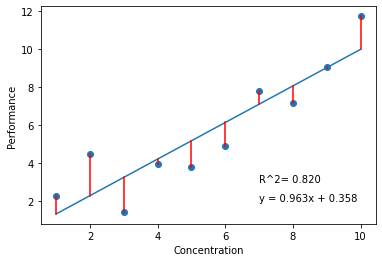

In [67]:
from scipy import stats 
import matplotlib.pyplot as plt


results = stats.linregress(conc,perf)
print(results)

plt.ylabel('Performance')

plt.xlabel('Concentration')

plt.scatter(conc,perf)

xs = [min(conc), max(conc)]
ys = [min(conc) * results.slope + results.intercept, max(conc) * results.slope + results.intercept]
plt.plot(xs, ys)

for i in range(len(conc)):
    xs = [conc[i],conc[i]]
    ys = [perf[i], conc[i]*results.slope + results.intercept]
    plt.plot(xs, ys, color = 'red')

r2_text = 'R^2= ' + "{:.3f}".format(results.rvalue**2)
eq_text = 'y = ' + "{:.3f}".format(results.slope) + 'x + ' + "{:.3f}".format(results.intercept)

plt.text(7,3, r2_text)
plt.text(7,2, eq_text)

plt.show()


### Questions:

What did the following line of code do when we were defining the dataset (be specific):
```
for i in range(10):
    perf[i] = conc[i] + np.random.normal(0, 1) 
```

###Your Answer here

What do the red lines represent on the graph?

###Your Answer here





add error tby multiplying the random.normal term by i or i/2

Another *assumption* of regression analysis makes an assumption 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats      #short name, no nickname needed


Asssumptions of regression - testing those assumptions

Outliers test provided in the book?

Plotting residuals
Checking data for normality

multiple correlations within a dataset and compare (Iris dataset?)

When to use regression vs. correlation

Multipanel display of regression data




## Correlation
From the data folder import `AvgTemp.csv` into a pandas dataframe named `AvgTemp` and display the data header:

In [3]:
# Import the data set and convert it to a pandas dataframe AveTemp, check the import by displaying the 'head'
temp = pd.read_csv('data/AvgTemp.csv')
print(len(temp))
print(type(temp))
print(temp.columns.values)
temp.head()


122
<class 'pandas.core.frame.DataFrame'>
['year' 'AvgTemp']


,year,AvgTemp
0,1887,-7.5
1,1888,-6.8
2,1889,-7.1
3,1890,-7.0
4,1891,-6.7


To run a correlation analysis within scipy.stats we use the incredibly simple format
```
stats.pearsonr(x,y)
```
"Pearson's r" is of course the correlation coefficient *r*. Try it yourself. Note that since a correlation analysis is about the co-variance between variables, it doesn't matter which value we use for x and which value we use for y. Try running it both ways and printing the results to prove that it is the same. 

In [4]:
#run and print the results of the correlation twice, using each variable as x and y
yearx = stats.pearsonr(temp['year'],temp['AvgTemp'])
print('Average Temp by Year Parameters:')
print(yearx)
print()
tempx = stats.pearsonr(temp['AvgTemp'], temp['year'])
print('Average Year by Temp Parameters:')
print(tempx)


Average Temp by Year Parameters:
(0.6388445026294713, 2.4263207499079536e-15)

Average Year by Temp Parameters:
(0.6388445026294713, 2.4263207499079536e-15)


Ok, so now we come to something that is going to come up a lot with statistical analyses. What do these outputs means and how do we interpret them? Luckily for us, SciPy.org maintains really nice documentation of each of the modules.  <a href = 'https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html'>The documentation for the `pearsonr` function</a> tells us that the two numbers we are seeing are the correlation coefficient *r* and the *p-value*, respectively. Don't worry about what the p value means for now, we will get to that. The data is stored as a <a href='https://www.w3schools.com/python/python_sets.asp'>tuple</a>, in which a single variable name is used to store multiple pieces of data. As you can see at 'Next' page at the link, 'Access Tuples', tuples can be indexed just like a list. In the next code window assign the results of the pearsonr function to a variable `results`, and then use that tuple to print out the following output.
    
```
r=  0.6388445026294715
p-value =  2.42632074990794e-15
```
    
    

In [5]:
# Generate your ouput of the correlation results here
results = yearx
print('r= ' + str(results[0]))
print('p-value = ' + str(results[1]))


r= 0.6388445026294713
p-value = 2.4263207499079536e-15


Now create a scatterplot for the dataset. Label the axes, and place the text you generated in an appropriate location on the image. Ta-dah! You've done your first correlation analysis. 

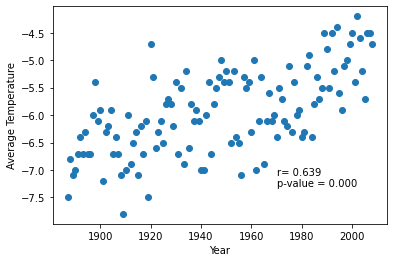

In [6]:
#Make your scatterplot here.


plt.ylabel('Average Temperature')

plt.xlabel('Year')

plt.scatter(temp['year'],temp['AvgTemp'])

r_text = 'r= ' + "{:.3f}".format(results[0])
p_text = 'p-value = ' + "{:.3f}".format(results[1])

plt.text(1970,-7.1, r_text)
plt.text(1970,-7.3, p_text)

plt.show()



## Regression

As you learned in the reading, correlation and regression are similar but different. Whereas correlation is about measuring the strength of association between two variables, regression is about building a model from which we can predict the value of a dependent variable *y* from the value of an indepdendent or predictor variable *x*. 

We will use the same data that we used above, as it's appropriate for regression analysis. For regression, it is in fact really important to keep our dependent and independent variables in the right order. In this example, we are trying to predict how temperature changes with year, so year is the x value.
```
stats.linregress(x,y)
```

In [7]:
# Run the linear regression here
results = stats.linregress(temp['year'],temp['AvgTemp'])
print(results)
print()
print(type(results))




LinregressResult(slope=0.01399374134643663, intercept=-33.18395881316894, rvalue=0.6388445026294712, pvalue=2.4263207499079685e-15, stderr=0.001538381493118527, intercept_stderr=2.9964877708631743)

<class 'scipy.stats._stats_mstats_common.LinregressResult'>


Note that the output is something different! If we consult <a href = 'https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html'>the SciPy documentation for lingregress</a> we see that it returns an *object*. You can google what this means, it's kind of deep, but it's similar to how we created plot objects with matplot lib. Functionally for us it means that our result has a lot of different named characteristics that are useful to us. 

Try the following. As you did above with the correlation, use a variable called results to store the results of the linear regression. This time, we will call from results using the names of the different elements in the object, like this `results.rvalue`. Use this to report the results of the regression. Your result should look like this
```
R^2 =  0.40812229853989646
r =  0.6388445026294712
slope =  0.01399374134643663
intercept =  -33.18395881316894
```

In [8]:
# Generate your ouput of the regression results here
print("R^2 = " + "{:.3f}".format(results.rvalue**2))
print("r = " + "{:.3f}".format(results.rvalue))
print("slope = " + "{:.3f}".format(results.slope))
print("intercept = " + "{:.3f}".format(results.intercept))

R^2 = 0.408
r = 0.639
slope = 0.014
intercept = -33.184


Note that the R^2 of a regression analysis is literally the *r* value of a correlation analysis squared. 

With a regression analysis, one thing we are doing is determining the equation of the line that best fits the data, in the sense that it minimizes the squared distance of the y values from that line. These values are reported as the slope and intercept. You should be able to create a line from the slope and intercept, plugging these values into your classic `y = mx + b ` equation for a line. 

For the final activity create a scatter plot of the data again, but this time add a regression line and annotate with the values from the regression, particularly R^2, and the slope and intercept of the line. 

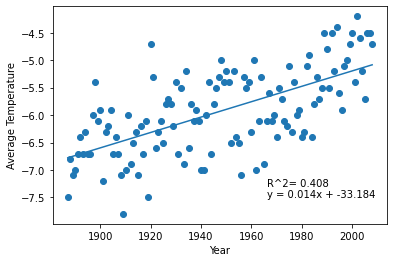

In [9]:
# Create your graph here
plt.ylabel('Average Temperature')

plt.xlabel('Year')

plt.scatter(temp['year'],temp['AvgTemp'])
xs = [min(temp['year']), max(temp['year'])]
ys = [min(temp['year']) * results.slope + results.intercept, max(temp['year']) * results.slope + results.intercept]
plt.plot(xs, ys)

r2_text = 'R^2= ' + "{:.3f}".format(results.rvalue**2)
eq_text = 'y = ' + "{:.3f}".format(results.slope) + 'x + ' + "{:.3f}".format(results.intercept)

plt.text(1966,-7.3, r2_text)
plt.text(1966,-7.5, eq_text)

plt.show()




![TJU logo image](images/TJU_logo_image.png "TJU logo image")